### C36624 - Camila Rodríguez Águila - Grupo 03 - Probabilidad y estadística

**Librerías a instalar**: pandas, numpy y matplotlibt

**Instalar con**: `pip install (nombre)`

Este código es un análisis de datos que busca la relación entre el PIB per cápita y la proporción de hogares con una sola persona en distintos países. Utiliza una base de datos tipo `.csv` y se analiza usando `pandas` con `python`.

### Qué hace el Código:

1. **Cargar los Datos:** 
   - Lee un archivo CSV que contiene datos sobre el PIB per cápita y la proporción de hogares de una sola persona en varios países.`(one-person-households-vs-gdp-per-capita.csv)`
   - Para facilitar el análisis, cambia algunos nombres largos.

2. **Filtrar Datos:**
   - Filtra los datos para incluir solo los años posteriores a 2015 y eliminar cualquier valor nulo.
   - Organiza los datos para eliminar duplicados, manteniendo solo la más reciente de cada país.

3. **Análisis Estadístico:**
   - Calcula estadísticas descriptivas como la media y la desviación estándar de la población total.
   - Grafica la relación entre la proporción de hogares de una sola persona y el PIB per cápita.

4. **Correlación:**
   - Calcula la correlación entre las dos variables principales (`Share 1p household` y `GDP per capita`), para ver si existe una relación real entre ellas.

5. **Manejo de Outliers:**
   - Identifica y elimina valores de países con un PIB per cápita muy alto para analizar cómo esto afecta la correlación.

In [1]:
#1
import pandas as pd
import numpy as num

### #2 Descripción de la Base de Datos 

La base de datos “one-person-households-vs-gdp-per-capita.csv” tiene las siguientes variables:

- **Entity**: País.
- **Code**: Código de país.
- **Year**: Año.
- **Total population (Gapminder, HYDE & UN)**: Población.
- **GDP per capita, PPP (constant 2011 international $)**: PIB per cápita.
- **Share of one person households**: Porcentaje de hogares con una sola persona.

### Preguntas de Análisis

1. **¿Hay alguna relación entre el PIB per cápita y el porcentaje de hogares de una sola persona?**
   - **¿Si un país tiene más dinero por persona, es más probable que la gente viva sola?**

2. **¿Los países desarrollados tienen más gente viviendo sola que los países en desarrollo?**

3. **¿Cuál es la relación entre la población total y el PIB per cápita en diferentes países?**


In [2]:
df = pd.read_csv("C:\\Users\\Cami VS\\Jupyter Notebooks\\one-person-households-vs-gdp-per-capita.csv")

In [3]:
#3 Imprimir filas
print(df.iloc[[9, 18, 72]]) #iloc: se

         Entity Code  Year  Total population (Gapminder, HYDE & UN) Continent  \
9   Afghanistan  AFG  1808                                3280000.0       NaN   
18  Afghanistan  AFG  1817                                3302044.0       NaN   
72  Afghanistan  AFG  1871                                4192245.0       NaN   

    GDP per capita, PPP (constant 2011 international $)  \
9                                                 NaN     
18                                                NaN     
72                                                NaN     

    Share of one person households  
9                              NaN  
18                             NaN  
72                             NaN  


In [4]:
#4 Imprimir nombres columnas(columns)
print(df.columns)

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita, PPP (constant 2011 international $)',
       'Share of one person households'],
      dtype='object')


In [5]:
#5a Renombrar columnas 
df.rename(columns={"GDP per capita, PPP (constant 2011 international $)": "GDP per capita", 
                   "Share of one person households": "Share 1p household"}, inplace=True) #inplace: no copias
# Verificar
print(df.columns)

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita', 'Share 1p household'],
      dtype='object')


In [6]:
#5b Número de filas y columnas
print(f"Filas: {df.shape[0]}") #Shape: 
print(f"Columnas: {df.shape[1]}")

print(df.head(100)) # Primeras 100 filas

Filas: 48175
Columnas: 7
         Entity      Code  Year  Total population (Gapminder, HYDE & UN)  \
0      Abkhazia  OWID_ABK  2015                                      NaN   
1   Afghanistan       AFG  1800                                3280000.0   
2   Afghanistan       AFG  1801                                3280000.0   
3   Afghanistan       AFG  1802                                3280000.0   
4   Afghanistan       AFG  1803                                3280000.0   
..          ...       ...   ...                                      ...   
95  Afghanistan       AFG  1894                                4832253.0   
96  Afghanistan       AFG  1895                                4863258.0   
97  Afghanistan       AFG  1896                                4894458.0   
98  Afghanistan       AFG  1897                                4925855.0   
99  Afghanistan       AFG  1898                                4957450.0   

   Continent  GDP per capita  Share 1p household  
0       Asi

In [7]:
#6 Más reciente que 2015, datos no nulos (notna), [nombre columnas]
dfReciente = df[(df['Year'] > 2015) & df['GDP per capita'].notna() & df['Share 1p household'].notna()]
# Muestra
print(dfReciente.head()) #Sin argumento: primeras 5 filas

         Entity Code  Year  Total population (Gapminder, HYDE & UN) Continent  \
1290     Angola  AGO  2016                               28842000.0       NaN   
2461  Australia  AUS  2016                               24263000.0       NaN   
2681    Austria  AUT  2016                                8747000.0       NaN   
2682    Austria  AUT  2017                                8820000.0       NaN   
4224    Belgium  BEL  2016                               11354000.0       NaN   

      GDP per capita  Share 1p household  
1290     5972.451513           10.813146  
2461    44493.480894           24.991852  
2681    44464.350268           37.000000  
2682    45436.685822           37.000000  
4224    42083.644304           34.100000  


In [8]:
#7 Ordenar por país y año (Sort_Values), eliminar duplicados dejando recientes (Drop duplicates, keep...)
dfNoReps= dfReciente.sort_values('Year').drop_duplicates(subset=['Entity'], keep='last')

# Muestra
print(dfNoReps.head())
print(f"\n Muestra nueva: {dfNoReps.shape[0]}") #Debería ser 43

        Entity Code  Year  Total population (Gapminder, HYDE & UN) Continent  \
1290    Angola  AGO  2016                               28842000.0       NaN   
19152  Iceland  ISL  2016                                 332000.0       NaN   
37715  Senegal  SEN  2016                               14994000.0       NaN   
29221  Myanmar  MMR  2016                               53045000.0       NaN   
29882    Nepal  NPL  2016                               27263000.0       NaN   

       GDP per capita  Share 1p household  
1290      5972.451513           10.813146  
19152    45630.938170           31.000000  
37715     2379.451264            8.378524  
29221     5305.047137            5.354498  
29882     2297.652539            6.447972  

 Muestra nueva: 43


In [9]:
#8 Media(mean) y desviación estándar(std)
media = dfNoReps['Total population (Gapminder, HYDE & UN)'].mean()
dsvEstandar = dfNoReps['Total population (Gapminder, HYDE & UN)'].std()

print(f"Media: {media}, Desviación estándar: {dsvEstandar}")

Media: 28930813.76744186, Desviación estándar: 53109874.72841308


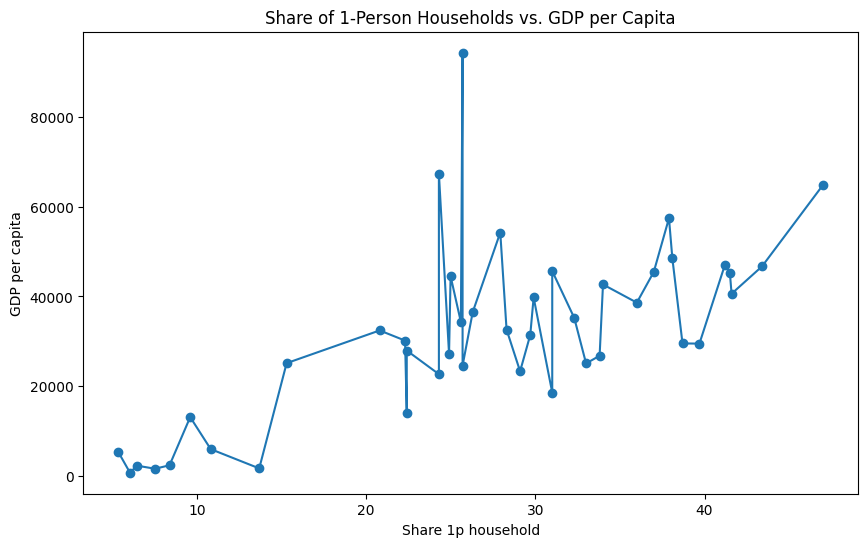

In [10]:
#9 Grafica "Share 1p household" y "GDP per capita"
import matplotlib.pyplot as plt #Librería de pandas para gráficos
dfOrden = dfNoReps.sort_values('Share 1p household') #Se utiliza el que no tiene repetidos (dfNoReps) y se ordena (Sort Values)

plt.figure(figsize=(10, 6)) #tamaño
plt.plot(dfOrden['Share 1p household'], dfOrden['GDP per capita'], marker='o') #indicar columnas a usar 
plt.xlabel('Share 1p household') #nombre eje x
plt.ylabel('GDP per capita') #nombre eje y
plt.title('Share of 1-Person Households vs. GDP per Capita') #título
plt.show() #imprimir


In [11]:
#10 Calcular la correlación
correlation = dfNoReps['Share 1p household'].corr(dfNoReps['GDP per capita']) #Correlacion (.corr)
print(f"Correlación: {correlation}")

Correlación: 0.6699849948192876


### Correlación

"La correlación es una medida estadística que indica la relación entre dos o más variables. Se utiliza para cuantificar la fuerza y la dirección de la relación entre dos variables. El coeficiente de correlación varía entre -1 y 1, donde un coeficiente de 1 indica una relación perfectamente positiva, -1 indica una relación perfectamente negativa y 0 indica ausencia de relación." (GrowUpCr, 2023)

En este caso la correlación es de: 0.6699...
Por lo que es una relación positiva ya que es al criterio que está más cerca (0.4), el índice más lejano a estar es completamente negativa (-1.6) por lo que podemos concluir que sí hay una relación entre las variables

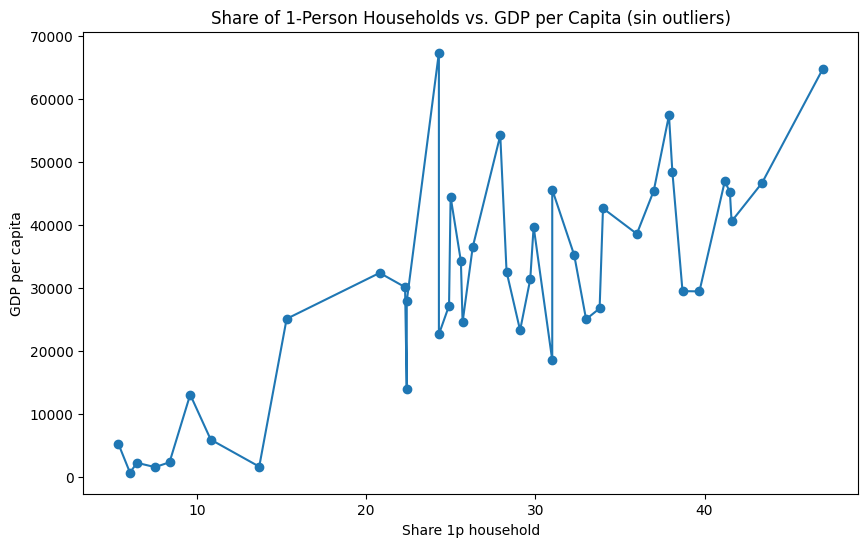

In [12]:
# Eliminar "outliers"
dfFiltro = dfNoReps[dfNoReps['GDP per capita'] <= 70000] 

# Re-grafico
dfOrdenFiltro = dfFiltro.sort_values('Share 1p household') #Ordenar

#Nueva grafica usando dfOrdenFiltro
plt.figure(figsize=(10, 6))
plt.plot(dfOrdenFiltro['Share 1p household'], dfOrdenFiltro['GDP per capita'], marker='o')
plt.xlabel('Share 1p household')
plt.ylabel('GDP per capita')
plt.title('Share of 1-Person Households vs. GDP per Capita (sin outliers)')
plt.show()


### Diferencia en gráficas

El primer gráfico tiene picos grandes porque incluye outliers. El segundo gráfico, sin esos outliers, se ve más suave y hace que la relación entre los hogares de una sola persona y el PIB sea más fácil de visualizar a mi parecer.

In [13]:
# Recalcular correlación
relac = dfFiltro['Share 1p household'].corr(dfFiltro['GDP per capita'])
print(f"Correlación (sin outliers): {relac}")
plt.close("all") #Cerrar plt


Correlación (sin outliers): 0.7789546455664673


### Qué ocurrió con la correlación?
Ahora sin outliers la correlación es de 0.7789 por lo que se puede observar que se acerca más a una correlación entre variables completamente positiva, por lo que podemos ver que efectivamente hay una relación entre el PIB de un país y los hogares de una sola persona.